In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
profiles = pd.read_csv("CSV Files/customer_profiles.csv")
details = pd.read_csv("CSV Files/ad_details.csv")
events = pd.read_csv("CSV Files/ad_events.csv")

In [3]:
events = events.drop_duplicates(subset='customer', keep='first')

df = pd.merge(profiles, events, left_on='id', right_on='customer', how='outer')

df = df.drop('id', axis=1)

df.insert(0, 'id', df.pop('customer'))

df = df.fillna(df.median())

In [4]:
for col in df.drop(['id', 'age', 'income', 'became_member_on (year month day)', 'time'], axis=1).columns:
    if df[col].dtype == object:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [5]:
times = pd.to_datetime(df['became_member_on (year month day)'], format='%Y%m%d')

In [6]:
years = []
months = []
days = []
for time in times:
    years.append(time.year)
    months.append(time.month)
    days.append(time.day)

In [7]:
df["day"] = days
df["month"] = months
df["year"] = years

In [8]:
df = df.drop('became_member_on (year month day)', axis=1)

In [9]:
scaler = StandardScaler()
data = scaler.fit_transform(df.drop(['id'], axis=1))
data = pd.DataFrame(data)

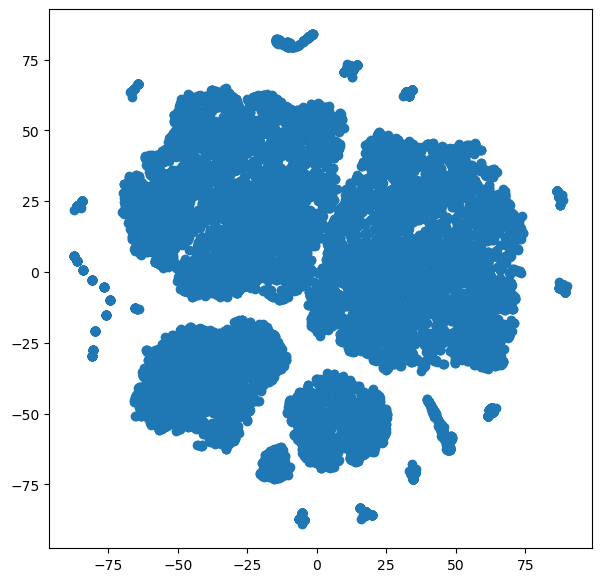

In [10]:
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(data)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

In [208]:
error = []
for n_eps in range(1, 16):
    model = DBSCAN(eps=n_eps, min_samples=50)
    model.fit(tsne_data)
    labels = model.labels_
    error.append(metrics.silhouette_score(tsne_data, labels))

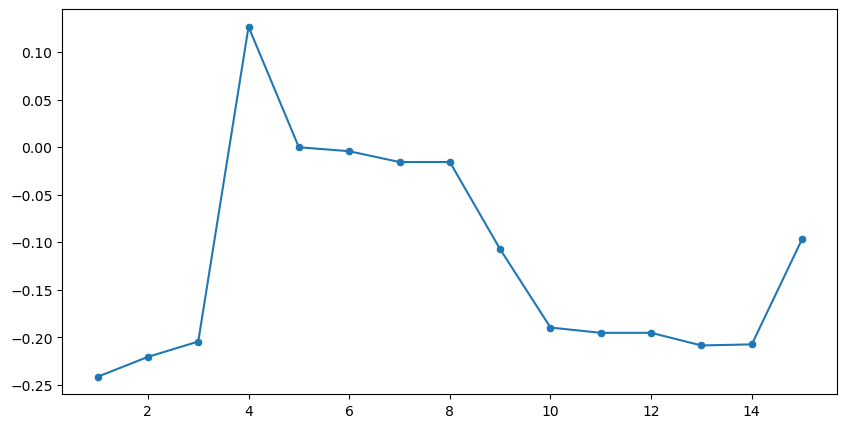

In [209]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 16), y=error)
sns.scatterplot(x=range(1, 16), y=error)
plt.show()

In [198]:
model = DBSCAN(eps=5.2, min_samples=50).fit(tsne_data)
segments = model.fit_predict(tsne_data)

In [199]:
core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True

In [200]:
labels = model.labels_

In [201]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [202]:
print(n_clusters_)
print(n_noise_)

17
119


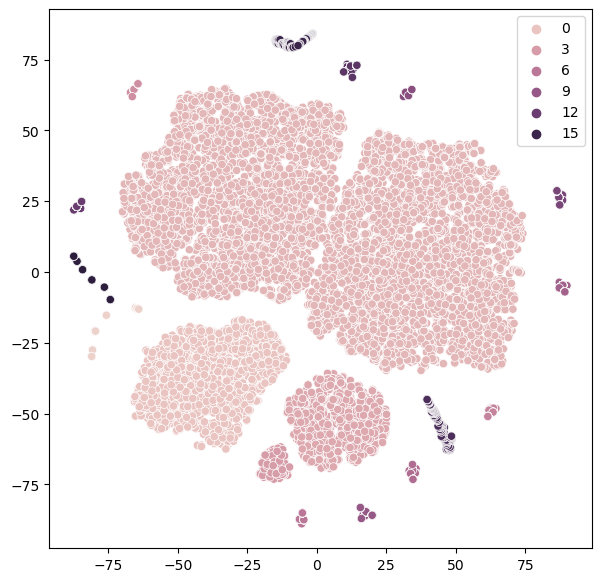

In [203]:
plt.figure(figsize=(7, 7))
sns.scatterplot(tsne_data[:, 0], tsne_data[:, 1], hue=segments)
plt.show()

In [204]:
sc = metrics.silhouette_score(tsne_data, labels)
print("Silhouette Coefficient:%0.4f" % sc)

Silhouette Coefficient:-0.0028
